In [ ]:
import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images

In [2]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


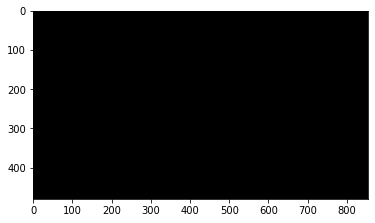

In [9]:
img = plt.imread('0.jpg')   # reading image using its name
plt.imshow(img)

In [10]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [11]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [12]:
y = data.Class
dummy_y = np_utils.to_categorical(y)

In [13]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [14]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [16]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [18]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 6s 2s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [19]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [20]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [21]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 3s 563ms/step - loss: 0.8466 - accuracy: 0.5484 - val_loss: 0.9513 - val_accuracy: 0.5821
Epoch 2/100
5/5 [==============================] - 2s 403ms/step - loss: 0.5146 - accuracy: 0.7806 - val_loss: 0.8285 - val_accuracy: 0.7313
Epoch 3/100
5/5 [==============================] - 2s 430ms/step - loss: 0.2533 - accuracy: 0.9097 - val_loss: 0.8330 - val_accuracy: 0.7313
Epoch 4/100
5/5 [==============================] - 2s 455ms/step - loss: 0.1229 - accuracy: 0.9871 - val_loss: 0.8097 - val_accuracy: 0.7164
Epoch 5/100
5/5 [==============================] - 2s 429ms/step - loss: 0.1076 - accuracy: 0.9742 - val_loss: 0.8173 - val_accuracy: 0.7313
Epoch 6/100
5/5 [==============================] - 2s 425ms/step - loss: 0.0721 - accuracy: 1.0000 - val_loss: 0.8278 - val_accuracy: 0.7612
Epoch 7/100
5/5 [==============================] - 2s 431ms/step - loss: 0.0544 - accuracy: 0.9871 - val_loss: 0.8289 - val_accuracy: 0.7463
Epoch 8/100
5

Epoch 59/100
5/5 [==============================] - 2s 411ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8717 - val_accuracy: 0.8060
Epoch 60/100
5/5 [==============================] - 2s 420ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8739 - val_accuracy: 0.8060
Epoch 61/100
5/5 [==============================] - 2s 419ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8755 - val_accuracy: 0.8060
Epoch 62/100
5/5 [==============================] - 2s 441ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8774 - val_accuracy: 0.8209
Epoch 63/100
5/5 [==============================] - 2s 392ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8791 - val_accuracy: 0.8209
Epoch 64/100
5/5 [==============================] - 2s 407ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8807 - val_accuracy: 0.8060
Epoch 65/100
5/5 [==============================] - 2s 423ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8820 - val_accuracy: 0.8060
Epoch 

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [27]:
test = pd.read_csv('test.csv')

In [28]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [29]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [30]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 1s 735ms/step


(9, 7, 7, 512)

In [31]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [32]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 53ms/step


In [33]:
print(predictions)

[[5.2758037e-06 9.9999475e-01]
 [2.1072649e-04 9.9978930e-01]
 [2.4299647e-03 9.9756998e-01]
 [7.8440056e-04 9.9921560e-01]
 [2.0788605e-03 9.9792117e-01]
 [3.5611203e-01 6.4388800e-01]
 [7.3129815e-01 2.6870179e-01]
 [5.7778615e-01 4.2221382e-01]
 [8.1834179e-01 1.8165818e-01]]


In [34]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")

No Accident
No Accident
No Accident
No Accident
No Accident
No Accident
Accident
Accident
Accident


In [35]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
dir_path ='C:/Users/hp/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main/Testing'
account_sid = 'AC0bc8365428af16b409eedba4e6d73e1b'
auth_token = '3380e6130d2d514a679da56e71461d6e'
client = Client(account_sid, auth_token)

In [40]:
cap = cv2.VideoCapture('C:/Users/hp/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main/Accident-1.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
                 body="Accident detected in "+locname.address,
                 from_= '+15674234628',
                 to= '+917730842713')

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()
